#  ***11. Advanced Programming Topics**

## **11.1. Methods**

In R, objects are organized using object-oriented programming principles where each object can belong to a specific "class". The class of an object determines how functions like `print()`, `summary()`, and others behave when applied to that object.

For instance, when you use `print(x)` in R, the software first checks the class attribute of `x`. If `x` has a class attribute, such as "factor", R will use a specialized printing function like `print.factor()` to display `x`. If `x` does not have a class attribute assigned, R defaults to using `print.default()`.

Classes in R can also have hierarchical relationships. An object's class attribute can be a vector of strings where the first element specifies its immediate class. If the object belongs to a subclass like an ordered factor, which inherits properties from the "factor" class, its class vector would look like "ordered" followed by "factor". This inheritance allows functions to apply specialized behaviors while still leveraging common functionalities defined for ancestor classes.

Understanding the class structure of objects in R helps you predict and control how different functions interpret and interact with your data, ensuring appropriate handling and interpretation based on its type and attributes.

In [1]:
 fac<-ordered(1:3)
 class(fac)

[1] "ordered" "factor"

Here fac has the class “ordered”, which inherits from the parent class “factor”.
The function print.ordered(), which is the function that is called when you invoke print() with an
ordered factor, could be rewritten to use the fact that “ordered” inherits from “factor”, thus:

In [8]:
print.ordered <- function(x, quote = FALSE) {
  if (length(x) <= 0) {
    cat("ordered(0)\n")
  } else {
    NextMethod("print")
    cat("Levels: ", paste(levels(x), collapse = " < "), "\n")
  }
  invisible(x)
}

print.ordered

function(x, quote = FALSE) {
  if (length(x) <= 0) {
    cat("ordered(0)\n")
  } else {
    NextMethod("print")
    cat("Levels: ", paste(levels(x), collapse = " < "), "\n")
  }
  invisible(x)
}

The system version of print.ordered() does not use print.factor(). The function print.glm() does
not call print.lm(), even though glm objects inherit from lm objects. The mechanism is avaialble for use if
required.

## **11.2 Extracting Arguments to Functions**

How, inside a function, can one extract the value assigned to a parameter when the function was called? Below
there is a function extract.arg(). When it is called as extract.arg(a=xx), we want it to return “xx”.
When it is called as extract.arg(a=xy), we want it to return “xy”. Here is how it is done.



In [9]:
extract.arg <-function (a)
{
s <- substitute(a)
as.character(s)
}
extract.arg(a=xy)

[1] "xy"

In [11]:
# If the argument is a function, we may want to get at the arguments to the function. Here is how one can do it

deparse.args <-function (a){
s <- substitute (a)
if(mode(s) == "call"){
# the first element of a 'call' is the function called
# so we don't deparse that, just the arguments.
 print(paste("The function is: ", s[1],"()", collapse=""))
lapply (s[-1], function (x)
paste (deparse(x), collapse = "\n"))
 }
else stop ("argument is not a function call")
}

deparse.args(list(x+y,foo(bar)))

[1] "The function is:  list ()"


[[1]]
[1] "x + y"

[[2]]
[1] "foo(bar)"

## **11.3 Parsing and Evaluation of Expressions**


When R encounters an expression such as mean(x+y) or cbind(x,y), there are two steps:
The text string is parsed and turned into an expression, i.e. the syntax is checked and it is turned into code that
the R computing engine can more immediately evaluate.
The expression is evaluated.
Upon typing in

expression(mean(x+y))

the output is the unevaluated expression expression(mean(x+y)). Setting


In [12]:
my.exp <- expression(mean(x+y))

stores this unevaluated expression in my.exp . The actual contents of my.exp are a little different from what is
printed out. R gives you as much information as it thinks helpful.
Note that expression(mean(x+y)) is different from expression(“mean(x+y)”), as is obvious when the
expression is evaluated. A text string is a text string is a text string, unless one explicitly changes it into an
expression or part of an expression.
Let’s see how this works in practice

In [13]:
x <- 101:110
y <- 21:30
my.exp <- expression(mean(x+y))
my.txt <- expression("mean(x+y)")
eval(my.exp)
eval(my.txt)


[1] 131

[1] "mean(x+y)"

What if we already have “mean(x+y)” stored in a text string, and want to turn it into an expression? The
answer is to use the function parse(), but indicate that the parameter is text rather than a file name. Thus

In [14]:
 parse(text="mean(x+y)")
expression(mean(x + y))

expression(mean(x + y))

expression(mean(x + y))

In [15]:
# We store the expression in my.exp2, and then evaluate it
 my.exp2 <- parse(text="mean(x+y)")
 eval(my.exp2)

[1] 131

Here is a function that creates a new data frame from an arbitrary set of columns of an existing data frame.
Once in the function, we attach the data frame so that we can leave off the name of the data frame, and use only
the column names

In [18]:
austpop<- read.csv("/content/austpop.csv")
make.new.df <- function(old.df = austpop, colnames = c("NSW", "ACT")) {
  attach(old.df)
  on.exit(detach(old.df))
  argtxt <- paste(colnames, collapse = ", ")
  exprtxt <- paste("data.frame(", argtxt, ")", sep = "")
  expr <- parse(text = exprtxt)
  df <- eval(expr, envir = parent.frame())  # Specify evaluation environment
  names(df) <- colnames
  df
}

# Assuming austpop is your data frame, and you want columns "NSW" and "ACT"
make.new.df()


NSW,ACT
<int>,<int>
1904,3
2402,8
2693,11
2985,17
3625,38
4295,103
5002,214
5617,265
6274,310


The function do.call() makes it possible to supply the function name and the argument list in separate text
strings. When do.call is used it is only necessary to use parse() in generating the argument list.
For example

In [21]:
make.new.df <- function(old.df = austpop, colnames = c("NSW", "ACT")) {
  attach(old.df)
  on.exit(detach(old.df))
  argtxt <- paste(colnames, collapse = ", ")
  listexpr <- parse(text = paste("list(", argtxt, ")", sep = ""))
  df <- as.data.frame(do.call("cbind", eval(listexpr)))
  names(df) <- colnames
  df
}
make.new.df()

NSW,ACT
<int>,<int>
1904,3
2402,8
2693,11
2985,17
3625,38
4295,103
5002,214
5617,265
6274,310


## **11.4 Plotting a mathematical expression**

The following, given without explanation, illustrates some of the possibilities. It needs better error checking
than it has at present:


In [22]:
plotcurve <- function(equation = "y = sqrt(1/(1+x^2))", ...) {
  leftright <- strsplit(equation, split = "=")[[1]]
  left <- trimws(leftright[1])  # The part to the left of the "="
  right <- trimws(leftright[2])  # The part to the right of the "="

  expr <- parse(text = right)
  xname <- all.vars(expr)

  if (length(xname) > 1) {
    stop(paste("There are multiple variables, i.e.", paste(xname, collapse = " & "),
               "on the right of the equation"))
  }

  if (length(list(...)) == 0) {
    assign(xname, 1:10)
  } else {
    nam <- names(list(...))
    if (nam != xname) {
      stop("Clash of variable names")
    }
    assign(xname, list(...)[[1]])
  }

  y <- eval(expr)
  yexpr <- parse(text = left)[[1]]
  xexpr <- parse(text = xname)[[1]]

  plot(x, y, ylab = as.character(yexpr), xlab = as.character(xexpr), type = "n")
  lines(spline(x, y))
  mainexpr <- paste(left, "==", right)
  title(main = mainexpr)
}


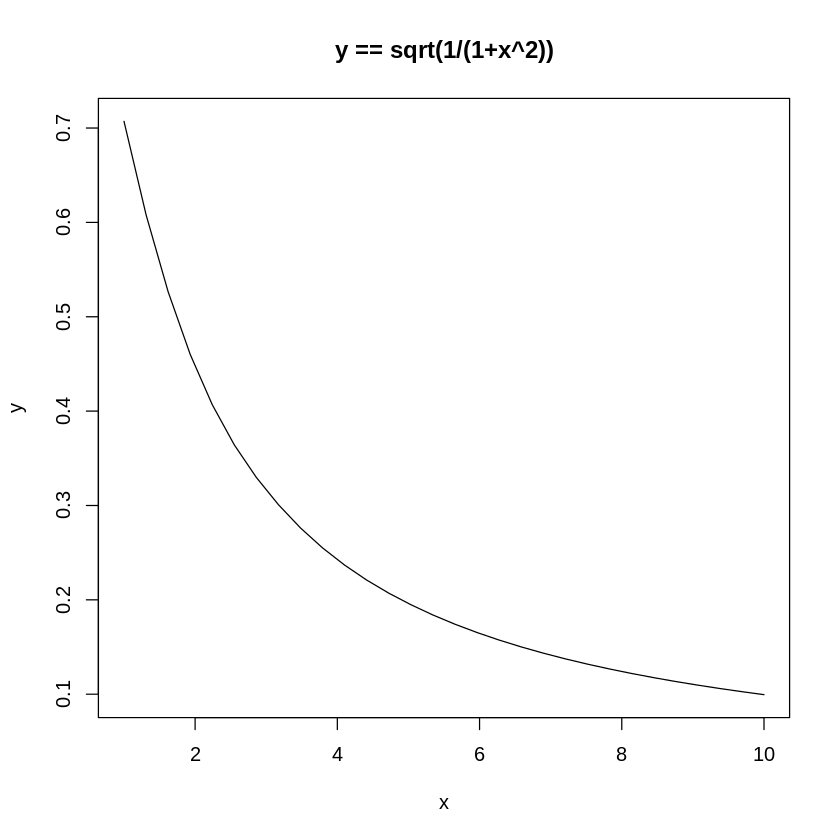

In [23]:
plotcurve()


## **11.5 Searching R functions for a specified token.**

A token is a syntactic entity; for example function names are tokens. For example, we search all functions in the
working directory. The purpose of using unlist() in the code below is to change myfunc from a list into a
vector of character strings.

In [29]:
mygrep <- function(str) {
  tempobj <- ls(envir = sys.frame(-1))  # Get names of objects in the current environment

  objstring <- character(0)  # Initialize an empty character vector to store object names

  for (i in tempobj) {
    myfunc <- get(i, envir = sys.frame(-1))  # Get the function object

    if (is.function(myfunc)) {
      func_code <- capture.output(print(myfunc))

      if (any(grepl(str, func_code))) {
        objstring <- c(objstring, i)  # Append the function name to the result vector
      }
    }
  }

  return(objstring)  # Return the vector of function names containing the string "str"
}

# Example usage:
mygrep("for")  # Find all functions that include a 'for' loop


[1] "mygrep"    "plotcurve"